In [1]:
# Importing Basic packages

import pandas as pd
import numpy as np
from collections import Counter
import scipy as sp
from scipy import stats

In [2]:
# Reading files
df = pd.read_csv('training_set_features.csv')
pd.set_option('display.max_columns',50)
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


### EDA on datset

In [3]:
# checking null values
df.isnull().sum()/len(df)

respondent_id                  0.000000
xyz_concern                    0.003445
xyz_knowledge                  0.004343
behavioral_antiviral_meds      0.002658
behavioral_avoidance           0.007788
behavioral_face_mask           0.000711
behavioral_wash_hands          0.001573
behavioral_large_gatherings    0.003258
behavioral_outside_home        0.003070
behavioral_touch_face          0.004793
doctor_recc_xyz                0.080878
doctor_recc_seasonal           0.080878
chronic_med_condition          0.036358
child_under_6_months           0.030704
health_worker                  0.030104
health_insurance               0.459580
opinion_xyz_vacc_effective     0.014640
opinion_xyz_risk               0.014528
opinion_xyz_sick_from_vacc     0.014790
opinion_seas_vacc_effective    0.017299
opinion_seas_risk              0.019246
opinion_seas_sick_from_vacc    0.020107
age_group                      0.000000
education                      0.052683
race                           0.000000


## Filling Categorical NaN values

In [4]:
Counter(df.marital_status)

Counter({'Married': 13555, 'Not Married': 11744, nan: 1408})

<Axes: xlabel='marital_status'>

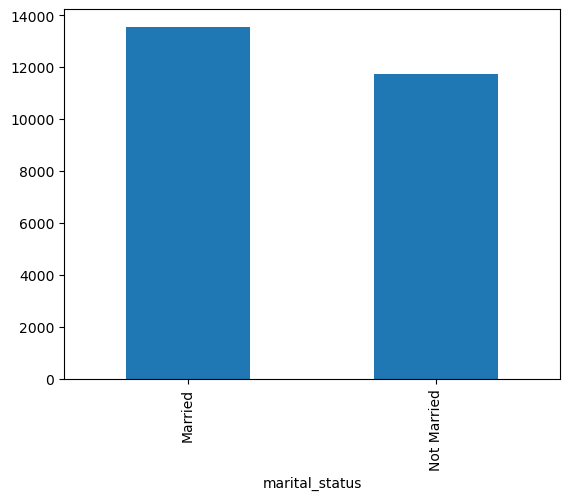

In [5]:
df.groupby(['marital_status'])['marital_status'].count().sort_values(ascending=False).plot.bar()

In [6]:
df['marital_status'].value_counts().index[0]

'Married'

In [7]:
Counter(df.rent_or_own)

Counter({'Own': 18736, 'Rent': 5929, nan: 2042})

<Axes: xlabel='rent_or_own'>

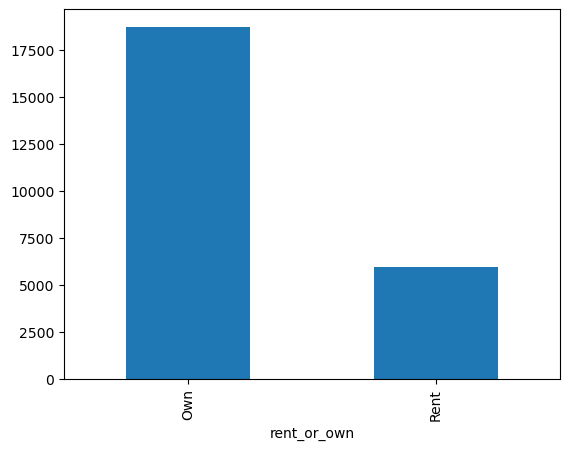

In [8]:
df.groupby(['rent_or_own'])['rent_or_own'].count().sort_values(ascending=False).plot.bar()

In [9]:
df['rent_or_own'].value_counts().index[0]

'Own'

In [10]:
Counter(df.employment_status)

Counter({'Employed': 13560,
         'Not in Labor Force': 10231,
         nan: 1463,
         'Unemployed': 1453})

<Axes: xlabel='employment_status'>

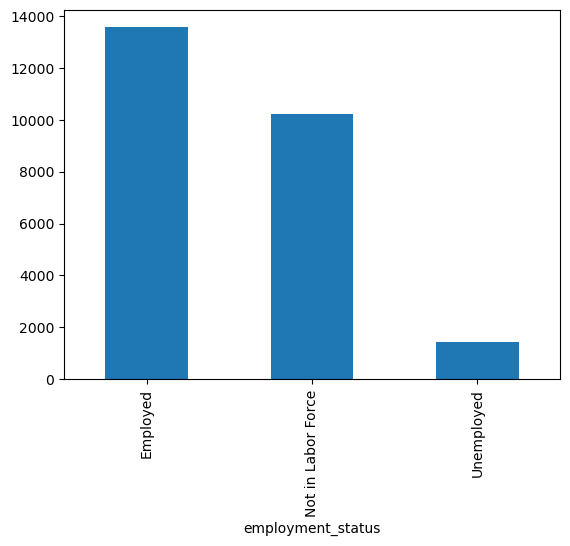

In [11]:
df.groupby(['employment_status']).employment_status.count().sort_values(ascending=False).plot.bar()

In [12]:
df['employment_status'].value_counts().index[0]

'Employed'

In [13]:
Counter(df.education)

Counter({'College Graduate': 10097,
         'Some College': 7043,
         '12 Years': 5797,
         '< 12 Years': 2363,
         nan: 1407})

<Axes: xlabel='education'>

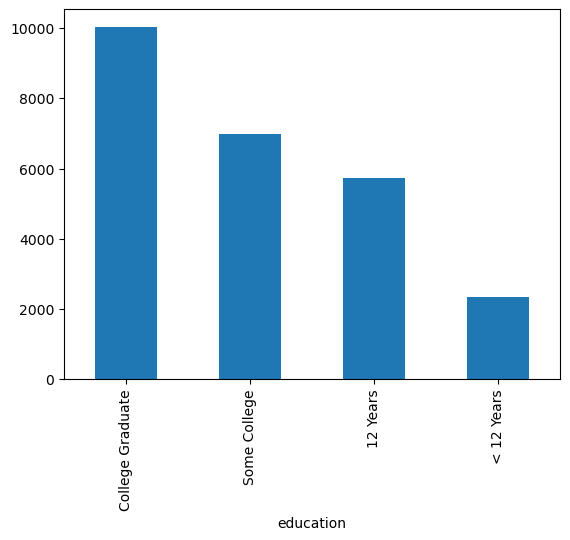

In [14]:
df.groupby('education').employment_status.count().sort_values(ascending=False).plot.bar()

In [15]:
df['education'].value_counts().index[0]

'College Graduate'

In [16]:
Counter(df.income_poverty)

Counter({'<= $75,000, Above Poverty': 12777,
         '> $75,000': 6810,
         nan: 4423,
         'Below Poverty': 2697})

<Axes: xlabel='income_poverty'>

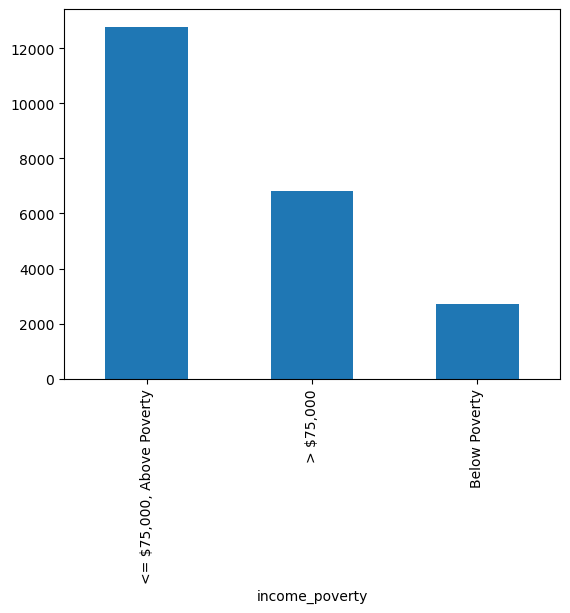

In [17]:
df.groupby('income_poverty').income_poverty.count().sort_values(ascending=False).plot.bar()

In [18]:
df.income_poverty.value_counts().index[0]

'<= $75,000, Above Poverty'

In [19]:
def impute_nan(dataset,variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [20]:
for feature in ['marital_status','rent_or_own','employment_status','education','income_poverty']:
    impute_nan(df,feature)

C:\Users\kumar\AppData\Local\Temp\ipykernel_20616\2705700876.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[variable].fillna(most_frequent_category,inplace=True)
C:\Users\kumar\AppData\Local\Temp\ipykernel_20616\2705700876.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [22]:
df.isnull().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                          0
race                               0
sex                                0
income_poverty                     0
m

### Filling Numerical nan values

In [23]:
mode1 = df.xyz_concern.mode()
mode1

0    2.0
Name: xyz_concern, dtype: float64

In [24]:
# To replace it with mode


df['xyz_concern'].fillna(df.xyz_concern.mode()[0], inplace=True)


C:\Users\kumar\AppData\Local\Temp\ipykernel_20616\4179469585.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['xyz_concern'].fillna(df.xyz_concern.mode()[0], inplace=True)


In [25]:
Counter(df.xyz_knowledge.unique())

Counter({0.0: 1, 2.0: 1, 1.0: 1, nan: 1})

In [26]:
mode2 = df.xyz_knowledge.mode()
mode2

0    1.0
Name: xyz_knowledge, dtype: float64

In [27]:
df.xyz_knowledge.value_counts()

xyz_knowledge
1.0    14598
2.0     9487
0.0     2506
Name: count, dtype: int64

In [28]:
df['xyz_knowledge'].fillna(df.xyz_concern.mode()[0], inplace=True)


C:\Users\kumar\AppData\Local\Temp\ipykernel_20616\2344069565.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['xyz_knowledge'].fillna(df.xyz_concern.mode()[0], inplace=True)


In [29]:
df.behavioral_antiviral_meds.value_counts()

behavioral_antiviral_meds
0.0    25335
1.0     1301
Name: count, dtype: int64

In [30]:
mode3 = df.behavioral_antiviral_meds.mode()
mode3

0    0.0
Name: behavioral_antiviral_meds, dtype: float64

In [32]:
df['behavioral_antiviral_meds'].fillna(df.xyz_concern.mode()[0], inplace=True)


C:\Users\kumar\AppData\Local\Temp\ipykernel_20616\1284834003.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['behavioral_antiviral_meds'].fillna(df.xyz_concern.mode()[0], inplace=True)


In [33]:
df.behavioral_avoidance.value_counts()            

behavioral_avoidance
1.0    19228
0.0     7271
Name: count, dtype: int64

In [34]:
mode4 = df.behavioral_avoidance.mode()         
mode4

0    1.0
Name: behavioral_avoidance, dtype: float64

In [35]:
df['behavioral_avoidance'].fillna(df.xyz_concern.mode()[0], inplace=True)


C:\Users\kumar\AppData\Local\Temp\ipykernel_20616\1716574215.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['behavioral_avoidance'].fillna(df.xyz_concern.mode()[0], inplace=True)


In [36]:
df.behavioral_face_mask.value_counts()

behavioral_face_mask
0.0    24847
1.0     1841
Name: count, dtype: int64

In [37]:
mode5 = df.behavioral_face_mask.mode()
mode5

0    0.0
Name: behavioral_face_mask, dtype: float64

In [38]:
df['behavioral_face_mask'].fillna(df.behavioral_face_mask.mode()[0],inplace=True)

C:\Users\kumar\AppData\Local\Temp\ipykernel_20616\492781853.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['behavioral_face_mask'].fillna(df.behavioral_face_mask.mode()[0],inplace=True)


In [39]:
df.behavioral_wash_hands.value_counts()

behavioral_wash_hands
1.0    22015
0.0     4650
Name: count, dtype: int64

In [40]:
mode6 = df.behavioral_wash_hands.mode()
mode6

0    1.0
Name: behavioral_wash_hands, dtype: float64

In [41]:
df['behavioral_wash_hands'].fillna(df.behavioral_wash_hands.mode()[0],inplace=True)

C:\Users\kumar\AppData\Local\Temp\ipykernel_20616\613329818.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['behavioral_wash_hands'].fillna(df.behavioral_wash_hands.mode()[0],inplace=True)


In [42]:
df.behavioral_large_gatherings.value_counts()

behavioral_large_gatherings
0.0    17073
1.0     9547
Name: count, dtype: int64

In [43]:
mode7 = df.behavioral_large_gatherings.mode()
mode7

0    0.0
Name: behavioral_large_gatherings, dtype: float64

In [44]:
df['behavioral_large_gatherings'].fillna(df.behavioral_large_gatherings.mode()[0],inplace=True)

C:\Users\kumar\AppData\Local\Temp\ipykernel_20616\907544277.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['behavioral_large_gatherings'].fillna(df.behavioral_large_gatherings.mode()[0],inplace=True)


In [45]:
df.behavioral_outside_home.value_counts()

behavioral_outside_home
0.0    17644
1.0     8981
Name: count, dtype: int64

In [46]:
mode8 = df.behavioral_outside_home.mode()
mode8


0    0.0
Name: behavioral_outside_home, dtype: float64

In [47]:
df['behavioral_outside_home'].fillna(df.behavioral_outside_home.mode()[0],inplace=True)

C:\Users\kumar\AppData\Local\Temp\ipykernel_20616\3978635302.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['behavioral_outside_home'].fillna(df.behavioral_outside_home.mode()[0],inplace=True)


In [48]:
df.behavioral_touch_face.value_counts()

behavioral_touch_face
1.0    18001
0.0     8578
Name: count, dtype: int64

In [49]:
mode9 = df.behavioral_touch_face.mode()
mode9


0    1.0
Name: behavioral_touch_face, dtype: float64

In [50]:
df['behavioral_touch_face'].fillna(df.behavioral_touch_face.mode()[0],inplace=True)

C:\Users\kumar\AppData\Local\Temp\ipykernel_20616\1062275055.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['behavioral_touch_face'].fillna(df.behavioral_touch_face.mode()[0],inplace=True)


In [51]:
df.doctor_recc_xyz.value_counts()

doctor_recc_xyz
0.0    19139
1.0     5408
Name: count, dtype: int64

In [52]:
mode10 = df.doctor_recc_xyz.mode()
mode10


0    0.0
Name: doctor_recc_xyz, dtype: float64

In [53]:
df['doctor_recc_xyz'].fillna(df.doctor_recc_xyz.mode()[0],inplace=True)

C:\Users\kumar\AppData\Local\Temp\ipykernel_20616\3541166296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['doctor_recc_xyz'].fillna(df.doctor_recc_xyz.mode()[0],inplace=True)


In [54]:
df.doctor_recc_seasonal.value_counts()

doctor_recc_seasonal
0.0    16453
1.0     8094
Name: count, dtype: int64

In [55]:
mode11 = df.doctor_recc_seasonal.mode()
mode11

0    0.0
Name: doctor_recc_seasonal, dtype: float64

In [56]:
df['doctor_recc_seasonal'].fillna(df.doctor_recc_seasonal.mode()[0],inplace=True)

C:\Users\kumar\AppData\Local\Temp\ipykernel_20616\1493906302.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['doctor_recc_seasonal'].fillna(df.doctor_recc_seasonal.mode()[0],inplace=True)


In [57]:
df.chronic_med_condition.value_counts()

chronic_med_condition
0.0    18446
1.0     7290
Name: count, dtype: int64

In [58]:
mode12 = df.chronic_med_condition.mode()
mode12

0    0.0
Name: chronic_med_condition, dtype: float64

In [59]:
df['chronic_med_condition'].fillna(df.chronic_med_condition.mode()[0],inplace=True)

C:\Users\kumar\AppData\Local\Temp\ipykernel_20616\577885035.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['chronic_med_condition'].fillna(df.chronic_med_condition.mode()[0],inplace=True)


In [60]:
df.child_under_6_months.value_counts()

child_under_6_months
0.0    23749
1.0     2138
Name: count, dtype: int64

In [61]:
mode13 = df.child_under_6_months.mode()
mode13

0    0.0
Name: child_under_6_months, dtype: float64

In [62]:
df['child_under_6_months'].fillna(df.child_under_6_months.mode()[0],inplace=True)

C:\Users\kumar\AppData\Local\Temp\ipykernel_20616\1410528522.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['child_under_6_months'].fillna(df.child_under_6_months.mode()[0],inplace=True)


In [63]:
df.health_worker.value_counts()

health_worker
0.0    23004
1.0     2899
Name: count, dtype: int64

In [64]:
mode14 = df.health_worker.mode()
mode14

0    0.0
Name: health_worker, dtype: float64

In [65]:
df['health_worker'].fillna(df.health_worker.mode()[0],inplace=True)

C:\Users\kumar\AppData\Local\Temp\ipykernel_20616\3053869530.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['health_worker'].fillna(df.health_worker.mode()[0],inplace=True)


In [66]:
df.health_insurance.value_counts()

health_insurance
1.0    12697
0.0     1736
Name: count, dtype: int64

In [67]:
mode15 = df.health_insurance.mode()
mode15


0    1.0
Name: health_insurance, dtype: float64

In [68]:
df['health_insurance'].fillna(df.health_insurance.mode()[0],inplace=True)

C:\Users\kumar\AppData\Local\Temp\ipykernel_20616\2789056894.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['health_insurance'].fillna(df.health_insurance.mode()[0],inplace=True)


In [69]:
df.opinion_xyz_vacc_effective.value_counts()

opinion_xyz_vacc_effective
4.0    11683
5.0     7166
3.0     4723
2.0     1858
1.0      886
Name: count, dtype: int64

In [70]:
mode16 = df.opinion_xyz_vacc_effective.mode()
mode16

0    4.0
Name: opinion_xyz_vacc_effective, dtype: float64

In [71]:
df['opinion_xyz_vacc_effective'].fillna(df.opinion_xyz_vacc_effective.mode()[0],inplace=True)

C:\Users\kumar\AppData\Local\Temp\ipykernel_20616\565771125.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['opinion_xyz_vacc_effective'].fillna(df.opinion_xyz_vacc_effective.mode()[0],inplace=True)


In [72]:
df.opinion_xyz_risk.value_counts()

opinion_xyz_risk
2.0    9919
1.0    8139
4.0    5394
5.0    1750
3.0    1117
Name: count, dtype: int64

In [73]:
mode17 = df.opinion_xyz_risk.mode()
mode17

0    2.0
Name: opinion_xyz_risk, dtype: float64

In [74]:
df['opinion_xyz_risk'].fillna(df.opinion_xyz_risk.mode()[0],inplace=True)

C:\Users\kumar\AppData\Local\Temp\ipykernel_20616\2090185607.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['opinion_xyz_risk'].fillna(df.opinion_xyz_risk.mode()[0],inplace=True)


In [75]:
df.opinion_xyz_sick_from_vacc.value_counts()

opinion_xyz_sick_from_vacc
2.0    9129
1.0    8998
4.0    5850
5.0    2187
3.0     148
Name: count, dtype: int64

In [76]:
mode18 = df.opinion_xyz_sick_from_vacc.mode()
mode18

0    2.0
Name: opinion_xyz_sick_from_vacc, dtype: float64

In [77]:
df['opinion_xyz_sick_from_vacc'].fillna(df.opinion_xyz_sick_from_vacc.mode()[0],inplace=True)

C:\Users\kumar\AppData\Local\Temp\ipykernel_20616\4067883275.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['opinion_xyz_sick_from_vacc'].fillna(df.opinion_xyz_sick_from_vacc.mode()[0],inplace=True)


In [78]:
df.opinion_seas_vacc_effective.value_counts()

opinion_seas_vacc_effective
4.0    11629
5.0     9973
2.0     2206
1.0     1221
3.0     1216
Name: count, dtype: int64

In [79]:
mode19 = df.opinion_seas_vacc_effective.mode()
mode19

0    4.0
Name: opinion_seas_vacc_effective, dtype: float64

In [80]:
df['opinion_seas_vacc_effective'].fillna(df.opinion_seas_vacc_effective.mode()[0],inplace=True)

C:\Users\kumar\AppData\Local\Temp\ipykernel_20616\2289015875.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['opinion_seas_vacc_effective'].fillna(df.opinion_seas_vacc_effective.mode()[0],inplace=True)


In [81]:
df.opinion_seas_risk.value_counts()

opinion_seas_risk
2.0    8954
4.0    7630
1.0    5974
5.0    2958
3.0     677
Name: count, dtype: int64

In [82]:
mode20 = df.opinion_seas_risk.mode()
mode20

0    2.0
Name: opinion_seas_risk, dtype: float64

In [83]:
df['opinion_seas_risk'].fillna(df.opinion_seas_risk.mode()[0],inplace=True)

C:\Users\kumar\AppData\Local\Temp\ipykernel_20616\447688518.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['opinion_seas_risk'].fillna(df.opinion_seas_risk.mode()[0],inplace=True)


In [84]:
df.opinion_seas_sick_from_vacc.value_counts()

opinion_seas_sick_from_vacc
1.0    11870
2.0     7633
4.0     4852
5.0     1721
3.0       94
Name: count, dtype: int64

In [85]:
mode21 = df.opinion_seas_sick_from_vacc.mode()
mode21

0    1.0
Name: opinion_seas_sick_from_vacc, dtype: float64

In [86]:
df['opinion_seas_sick_from_vacc'].fillna(df.opinion_seas_sick_from_vacc.mode()[0],inplace=True)

C:\Users\kumar\AppData\Local\Temp\ipykernel_20616\316708407.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['opinion_seas_sick_from_vacc'].fillna(df.opinion_seas_sick_from_vacc.mode()[0],inplace=True)


In [87]:
df.household_adults.value_counts()

household_adults
1.0    14474
0.0     8056
2.0     2803
3.0     1125
Name: count, dtype: int64

In [88]:
mode22 = df.household_adults.mode()
mode22

0    1.0
Name: household_adults, dtype: float64

In [89]:
df['household_adults'].fillna(df.household_adults.mode()[0],inplace=True)

C:\Users\kumar\AppData\Local\Temp\ipykernel_20616\4093941501.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['household_adults'].fillna(df.household_adults.mode()[0],inplace=True)


In [90]:
df.household_children.value_counts()

household_children
0.0    18672
1.0     3175
2.0     2864
3.0     1747
Name: count, dtype: int64

In [91]:
mode23 = df.household_children.mode()
mode23

0    0.0
Name: household_children, dtype: float64

In [92]:
df['household_children'].fillna(df.household_children.mode()[0],inplace=True)

C:\Users\kumar\AppData\Local\Temp\ipykernel_20616\703725637.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['household_children'].fillna(df.household_children.mode()[0],inplace=True)


In [93]:
df.isnull().sum()

respondent_id                      0
xyz_concern                        0
xyz_knowledge                      0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_xyz                    0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance                   0
opinion_xyz_vacc_effective         0
opinion_xyz_risk                   0
opinion_xyz_sick_from_vacc         0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                          0
race                               0
sex                                0
income_poverty                     0
m

In [94]:
df = df.drop(['employment_industry','employment_occupation'],axis=1)
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0


### Output Features

In [95]:
df1 = pd.read_csv('training_set_labels.csv')
df1.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [96]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   xyz_vaccine       26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [97]:
df1.isnull().sum()

respondent_id       0
xyz_vaccine         0
seasonal_vaccine    0
dtype: int64

### Merging the csv files

In [98]:
# using merge function by setting how='outer'
output = pd.merge(df, df1, 
                   on='respondent_id', 
                   how='outer')

In [99]:
output.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0,0


In [100]:
output.isnull().sum()

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [101]:
# X is the input column and y is output column


X = output.iloc[:,:-2]
y = output['xyz_vaccine']
y1 = output['seasonal_vaccine']


In [102]:
y

0        0
1        0
2        0
3        0
4        0
        ..
26702    0
26703    0
26704    0
26705    0
26706    0
Name: xyz_vaccine, Length: 26707, dtype: int64

### onehot encoding

In [103]:


X = pd.get_dummies(output,columns=['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa'])

In [104]:
pd.set_option('display.max_columns',100)

X

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,xyz_vaccine,seasonal_vaccine,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0,0,False,False,False,True,False,False,True,False,False,False,False,False,True,True,False,False,False,True,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0,1,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0,0,True,False,False,False,False,False,False,True,False,False,False,False,True,False,True,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0,1,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False,False,False,True,False,True,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0,0,False,False,True,False,False,False,False,False,True,False,False,False,True,True,False,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0,0,0,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False,True,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0,0,0,True,False,False,False,False,False,False,True,False,False,False,False,True,False,True,True,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,2.0

In [105]:
## Dropping features to avoid dummy variable trap in onehot encoding

X.drop(['age_group_18 - 34 Years','education_12 Years','race_Black','sex_Female','income_poverty_<= $75,000, Above Poverty','marital_status_Married','rent_or_own_Own','employment_status_Employed','hhs_geo_region_atmpeygn','census_msa_Non-MSA'], axis = 1,inplace = True)                                 

In [106]:
X

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,xyz_vaccine,seasonal_vaccine,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,"income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Not Married,rent_or_own_Rent,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City"
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0,0,False,False,True,False,True,False,False,False,False,True,False,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0,1,True,False,False,False,False,False,False,False,False,True,True,False,True,True,True,False,False,True,False,False,False,False,False,False,False,False,True,False
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0,0,False,False,False,False,False,True,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0,1,False,False,False,True,False,False,False,False,False,True,False,False,True,True,True,True,False,False,False,False,False,True,False,False,False,False,False,True
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0,0,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0,0,0,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0,0,0,False,False,False,False,False,True,False,False,False,True,True,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,True
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0,0,1,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0,0,0,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False


## Decision Tree

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


In [110]:
#  Train Test Split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=10)

In [128]:
# Model selection

model = DecisionTreeClassifier(max_depth=4)
model

DecisionTreeClassifier(max_depth=4)

In [129]:
# Training
model.fit(X_train,y_train)
y_predict = model3.predict(X_test)
accuracy_score(y_test,y_predict)

1.0

In [115]:
X

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,xyz_vaccine,seasonal_vaccine,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,"income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Not Married,rent_or_own_Rent,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City"
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0,0,False,False,True,False,True,False,False,False,False,True,False,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0,1,True,False,False,False,False,False,False,False,False,True,True,False,True,True,True,False,False,True,False,False,False,False,False,False,False,False,True,False
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0,0,False,False,False,False,False,True,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0,1,False,False,False,True,False,False,False,False,False,True,False,False,True,True,True,True,False,False,False,False,False,True,False,False,False,False,False,True
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0,0,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0,0,0,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0,0,0,False,False,False,False,False,True,False,False,False,True,True,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,True
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0,0,1,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0,0,0,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False


In [116]:
y.value_counts()

xyz_vaccine
0    21033
1     5674
Name: count, dtype: int64

In [117]:
y1.value_counts()

seasonal_vaccine
0    14272
1    12435
Name: count, dtype: int64

In [118]:
# For unseen values/new values prediction
model3.predict([[0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0]]) 

C:\Users\kumar\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [121]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2100
           1       1.00      1.00      1.00       571

    accuracy                           1.00      2671
   macro avg       1.00      1.00      1.00      2671
weighted avg       1.00      1.00      1.00      2671



In [124]:
confusion_matrix(y_test,y_predict)

array([[2100,    0],
       [   0,  571]], dtype=int64)

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X_train, y_train)
roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
roc_auc_score(y_train, clf.decision_function(X_train))

0.9999996894895279

In [ ]:
Finally

The ROC AUC score is 0.999999 which is good